In [1]:
# Loading Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Loading Iris Data Set into pandas DataFrame
iris_data = pd.read_csv("iris.csv") # Change the path if the data set is in a different folder

#View the first five (5) rows
iris_data.head() 

#Specify a number in the head() method to display more
#iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
# Shape of the data set
iris_data.shape

(150, 5)

In [42]:
#Getring the list of columns
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
#Getting basic information 
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
#From the info() method output we no we have 150 total samples/Species
#With Six (6) unique columns

In [27]:
#Getting basic/summary statistics on the data set

iris_data.describe() #Only for numeric values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
# Drop the Id columns
iris_data = iris_data.drop('Id', axis=1)


In [29]:
#Checking for missing values 
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
#Unique values of Species
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [30]:
#There are no missing values in the data set
#Lets look at some graphs

In [31]:
#Checking how variables correlate with each other
correlation = iris_data.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


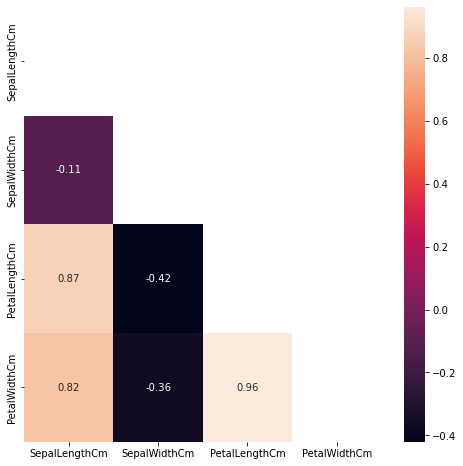

In [40]:
#Visualizing correlation with seaborn heatmap
matrix = np.triu(correlation)
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True, mask=matrix) # Only display half of the triangle since the other half is the same
plt.show()

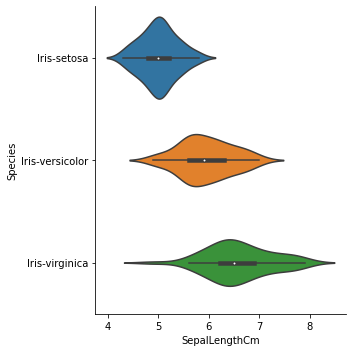

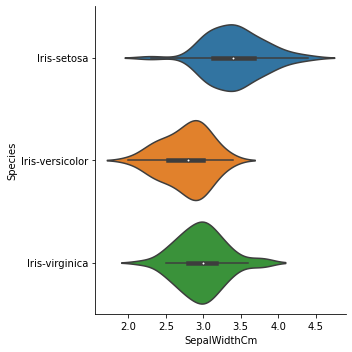

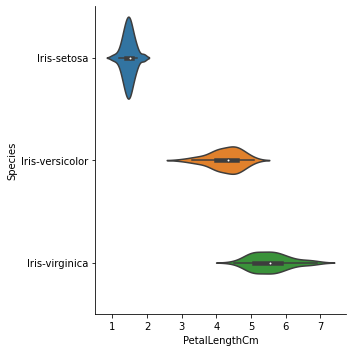

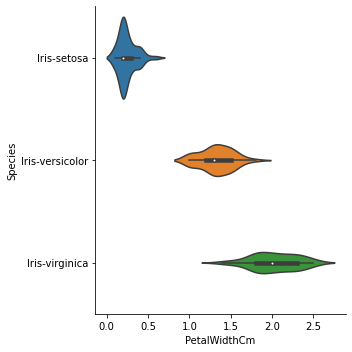

In [43]:
# Selecting important features in the data set
# Visualization of data

selected_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]
for feature in selected_features:
    sns.catplot(x=feature, y= "Species", data=iris_data, kind="violin")
    plt.show()

In [44]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

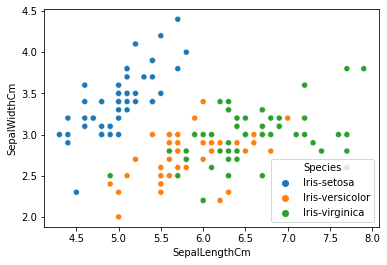

In [46]:
#Plotting Scatter plot to see how close the data set are
#Plotting SepalLengthCm and SepalWidthCm

sns.scatterplot(data=iris_data, x="SepalLengthCm", y="SepalWidthCm", hue="Species" )
plt.show()

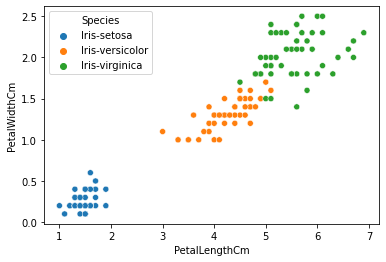

In [47]:
#Plotting PetalLengthCm and PetalWidthCm

sns.scatterplot(data=iris_data, x="PetalLengthCm", y="PetalWidthCm", hue="Species" )
plt.show()

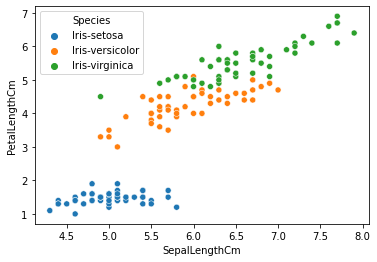

In [48]:
#Plotting SepalLengthCm and PetalLengthCm
sns.scatterplot(data=iris_data, x="SepalLengthCm", y="PetalLengthCm", hue="Species" )
plt.show()

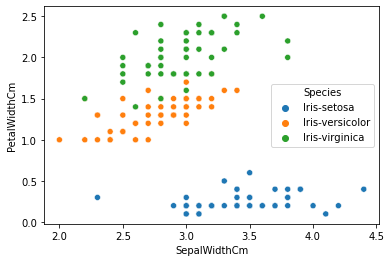

In [49]:
#Plotting SepalWidthCm and PetalWidthCm
sns.scatterplot(data=iris_data, x="SepalWidthCm", y="PetalWidthCm", hue="Species" )
plt.show()

In [50]:
#Separating the Independent variable from the dependents variabls

X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [73]:
# Splitting Data set in Traing and validation set
from sklearn.model_selection import train_test_split
X_train, val_X, y_train, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [84]:
# Lets creat a function with two models - Decision Tree and Random Forest
from sklearn.metrics import accuracy_score

def models(X_train, val_X):
    #defining Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train)
    
    #Defining Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train, y_train)

    
    print(f"Decision Tree Accuracy: {tree.score(X_train,y_train)*100}%")
    print(f"Random Forest Accuracy:  {forest.score(X_train,y_train)*100}%")
    return tree, forest


    

In [85]:
#Using the training data
model = models(X_train, y_train)

Decision Tree Accuracy: 100.0%
Random Forest Accuracy:  100.0%


In [88]:
#Using the validation data

tree_val = model[0].predict(val_X)
forest_val = model[1].predict(val_X)

print(f"Decision Tree Validation Set accuracy: {accuracy_score(tree_val, val_y)*100}%")
print(f"Random Forest Validation Set accuracy {accuracy_score(forest_val, val_y)*100}%")

Decision Tree Validation Set accuracy: 100.0%
Random Forest Validation Set accuracy 100.0%


Mking a single prediction using model   
input values of     ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [90]:
# SepalLengthCm = 6.4, SepalWidthCm = 2.8, PetalLenghtCm = 5.6, PetalWidthCm = 2.2
input_features = (6.4,2.8,5.6,2.2)

#Coverty input_features to a numpy array
input_features = np.asarray(input_features)

#Reshape input_features to indicate a sinple sample
input_features = input_features.reshape(1,-1)

In [92]:
#Making prediction
tree_preds = model[0].predict(input_features)
tree_preds

array(['Iris-virginica'], dtype=object)

In [93]:
forest_preds = model[1].predict(input_features)
forest_preds

array(['Iris-virginica'], dtype=object)